### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [20]:
# Import Necessary Libraries
import pandas as pd 

### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [21]:
# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv("pet_adoption_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Dataset shape (rows, columns):", df.shape)


# Step 3: Display the first few rows of the dataset to get an overview
df.head()

Dataset shape (rows, columns): (2007, 13)


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [22]:
# Step 4: Drop the columns that do not add much value to the analysis
df = df.drop(columns=['pet_id'])

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_34119/619943550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='adoption_likelihood', data=df, palette="viridis")


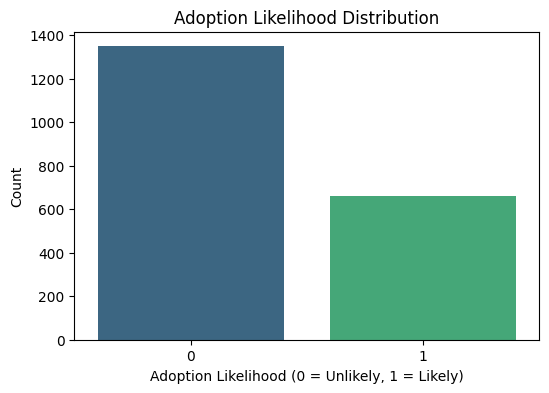

In [23]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='adoption_likelihood', data=df, palette="viridis")
plt.title("Adoption Likelihood Distribution")
plt.xlabel("Adoption Likelihood (0 = Unlikely, 1 = Likely)")
plt.ylabel("Count")
plt.show()

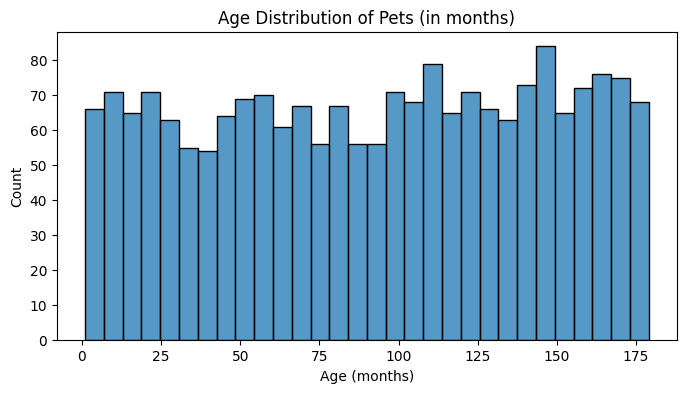

In [24]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
plt.figure(figsize=(8,4))
sns.histplot(df['age_months'], bins=30, kde=False)
plt.title("Age Distribution of Pets (in months)")
plt.xlabel("Age (months)")
plt.ylabel("Count")
plt.show()

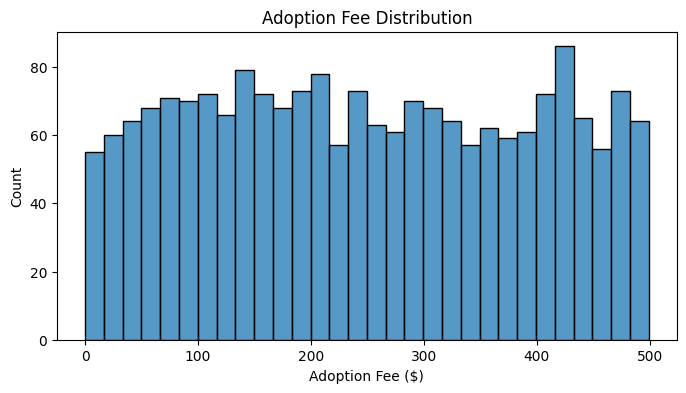

In [25]:

# Step 7: Visualize the distribution of 'adoption_fee' using a histogram
plt.figure(figsize=(8,4))
sns.histplot(df['adoption_fee'], bins=30, kde=False)
plt.title("Adoption Fee Distribution")
plt.xlabel("Adoption Fee ($)")
plt.ylabel("Count")
plt.show()

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'color'`, `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
    - `'adoption_fee'`: Standard scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [26]:
# Step 1: Encode the categorical variables
size_mapping = {'Small':1, 'Medium':2, 'Large':3}
df['size'] = df['size'].map(size_mapping)
# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).


# Encode 'color', 'pet_type' and 'breed' using one-hot encoding
df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)

In [27]:
# Step 2: Scale the numerical features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Scale 'weight_kg' using MinMaxScaler
minmax = MinMaxScaler()
df[['weight_kg']] = minmax.fit_transform(df[['weight_kg']])

# Scale 'adoption_fee' using StandardScaler
scaler = StandardScaler()
df[['adoption_fee']] = scaler.fit_transform(df[['adoption_fee']])

#Why MinMax? Because weight has no upper bound and large ranges — scaling avoids bias towards heavy animals

In [28]:
# step3: Display the first few rows of the updated dataset.
df.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,0.138783,1,0,27,-0.764025,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,0.520009,0,0,8,-0.098998,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,0.036514,0,0,85,0.951044,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,0.080105,0,0,61,-0.225003,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,0.672244,0,0,28,-1.646060,1,0,False,...,False,False,False,True,False,False,False,False,True,False


### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [29]:
# Step 1: Select the features and the target variable for modeling
from sklearn.model_selection import train_test_split
X = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1404, 21)
Testing set shape: (603, 21)


In [30]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Step 4: Print the model's accuracy score on the test data

train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.8723051409618574


In [31]:
# Step 5: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       405
           1       0.81      0.80      0.81       198

    accuracy                           0.87       603
   macro avg       0.86      0.85      0.86       603
weighted avg       0.87      0.87      0.87       603

Confusion Matrix:
 [[367  38]
 [ 39 159]]


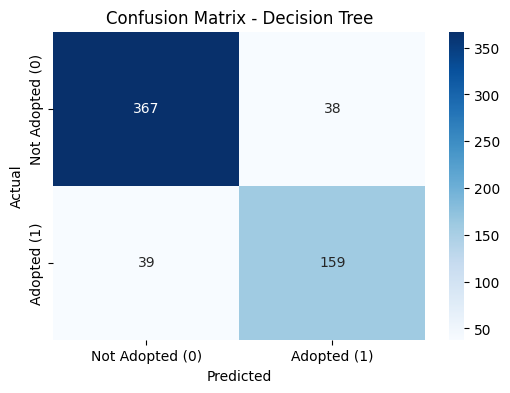

In [32]:
# Step 7: Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted (0)', 'Adopted (1)'],
            yticklabels=['Not Adopted (0)', 'Adopted (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [33]:
# Step 1: Train the Decision Tree model with specified hyperparameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf_hp = DecisionTreeClassifier(
    criterion='entropy',   # information gain
    max_depth=5,           # max depth of tree
    min_samples_split=10,  # min samples required to split an internal node
    min_samples_leaf=5,    # min samples required to be at a leaf node
    random_state=42
)
clf_hp.fit(X_train, y_train)

# Step 2: Print the model's accuracy score on the test data
train_acc = clf_hp.score(X_train, y_train)
test_acc  = clf_hp.score(X_test,  y_test)
print("Train accuracy:", round(train_acc, 4))
print("Test  accuracy:", round(test_acc, 4))
# Step 3: Make predictions on the test set
y_pred = clf_hp.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 4: Evaluate the model using a classification report and confusion matrix



Train accuracy: 0.906
Test  accuracy: 0.8939

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       405
           1       0.81      0.88      0.84       198

    accuracy                           0.89       603
   macro avg       0.88      0.89      0.88       603
weighted avg       0.90      0.89      0.89       603

Confusion Matrix:
 [[365  40]
 [ 24 174]]


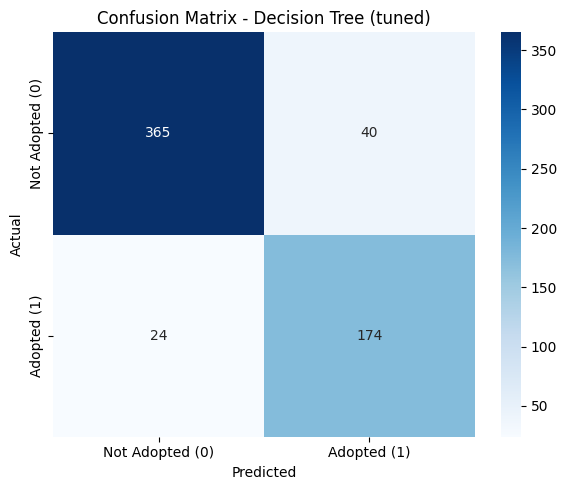

In [34]:
# Step 5: Visualize the confusion matrix
# Step 4: Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted (0)', 'Adopted (1)'],
            yticklabels=['Not Adopted (0)', 'Adopted (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (tuned)")
plt.tight_layout()
plt.show()

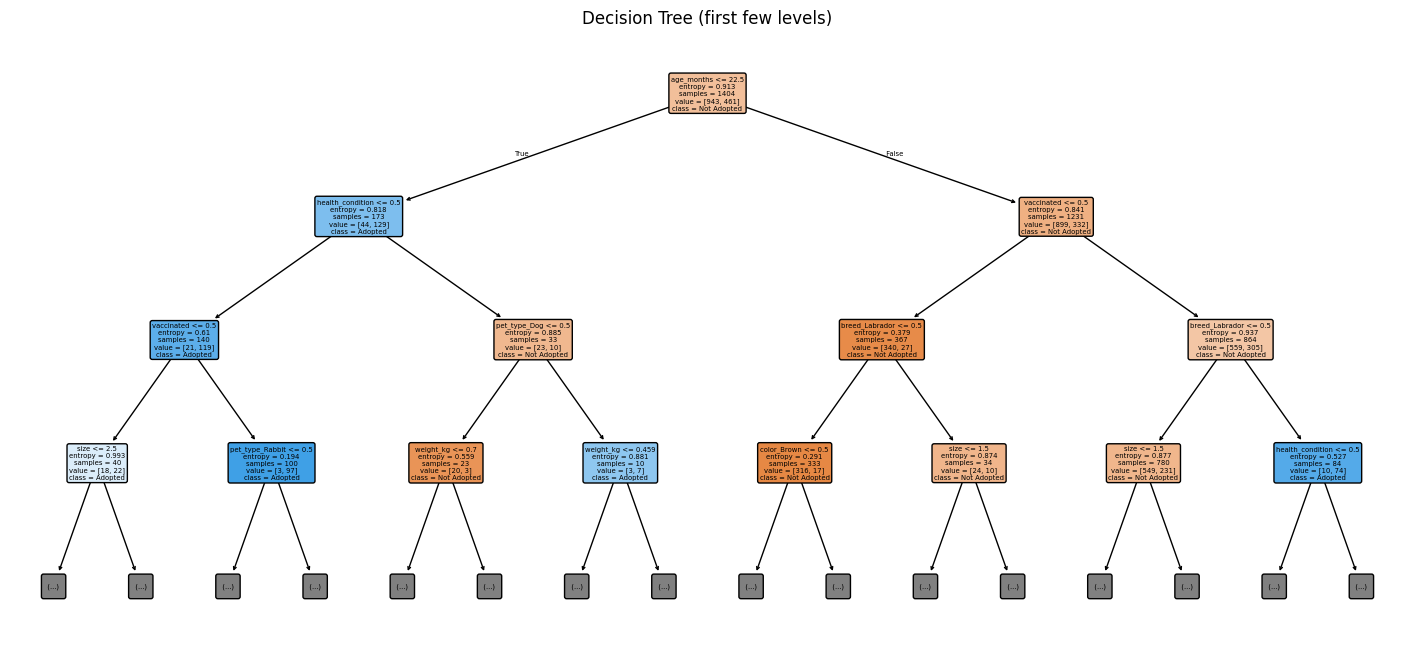

In [35]:
# Step 6: Visualize the decision tree
# Step 5: Plot the tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(18,8))
plot_tree(clf_hp,
          feature_names=X_train.columns,
          class_names=['Not Adopted', 'Adopted'],
          filled=True,
          rounded=True,
          proportion=False,
          max_depth=3)   # show top levels for readability
plt.title("Decision Tree (first few levels)")
plt.show()